In [4]:
import os 
import sys 

sys.path.append('/home/robers/projects/TimeXer')
os.chdir('/home/robers/projects/TimeXer')

%load_ext autoreload
%autoreload 2

In [11]:
from utils.src.ploting import plot_data
import pickle
import torch

folder_path = '/home/robers/projects/TimeXer/playgrounds/predicted_data'

# Open batch_x, batch_y, batch_x_mark, outputs
with open(folder_path + '/batch_x.pkl', 'rb') as f:
    batch_x = pickle.load(f)

with open(folder_path + '/batch_y.pkl', 'rb') as f:
    batch_y = pickle.load(f)

with open(folder_path + '/batch_x_mark.pkl', 'rb') as f:
    batch_x_mark = pickle.load(f)

with open(folder_path + '/outputs.pkl', 'rb') as f:
    outputs = pickle.load(f)
    
print(batch_x.shape, batch_y.shape, batch_x_mark.shape, outputs.shape)

torch.Size([5, 128, 4]) torch.Size([5, 24, 1]) torch.Size([5, 128, 4]) torch.Size([5, 24, 1])


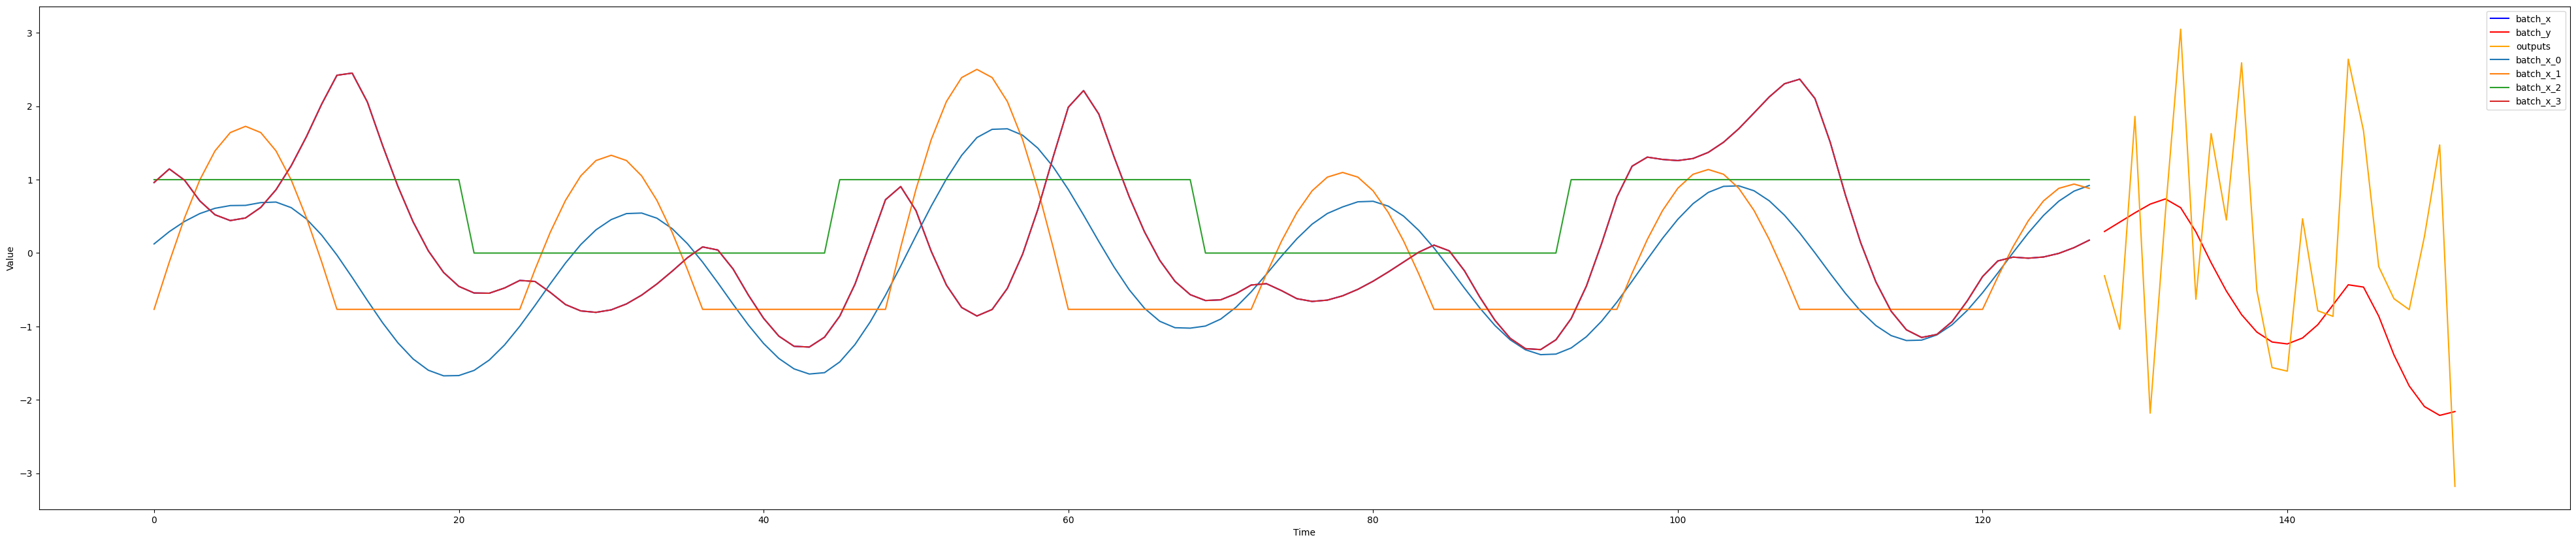

In [17]:
plot_data(batch_x, batch_y, batch_x_mark, outputs, 0)